In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import csv file from local directory "datasets/auta/Automobile.csv"
df = pd.read_csv("dataset/auta/archive/Automobile.csv")
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


(array([57., 28., 40., 27., 30., 62., 36., 29., 29., 60.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <BarContainer object of 10 artists>)

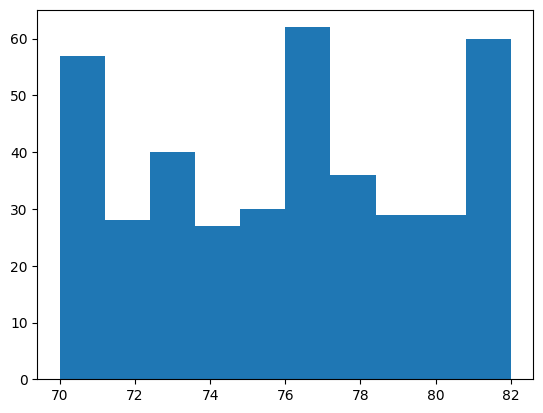

In [7]:
(df["model_year"])
# make histogram of model_year
plt.hist(df["model_year"])

In [9]:
df2 = pd.read_csv("dataset/supermarket/archive (1)/supermarket_sales - Sheet1.csv")
df2.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
# count number of occurences where gender is female and product line is Health and beauty
females = df2[df2["Gender"] == "Female"]
females_who_bought_beaty = females[females["Product line"] == "Health and beauty"]
males = df2[df2["Gender"] == "Male"]
males_who_bought_beaty = males[males["Product line"] == "Health and beauty"]
print(females.shape[0])
print(females_who_bought_beaty.shape[0])
print(males.shape[0])
print(males_who_bought_beaty.shape[0])



501
64
499
88


In [39]:
aa = df2["Gender"] == "Female"
type(aa)
print(aa[0])
print(aa[1])

True